In [2]:
'''
 [실습] 선형분리불가 문제의 SVM – LinearSVM
'''
import numpy as np
from sklearn.datasets._samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

training data = 
 [[95  1]
 [ 3 88]]
testing data = 
 [[29  0]
 [ 1 33]]


Text(0.5, 1.0, 'Linear SVM')

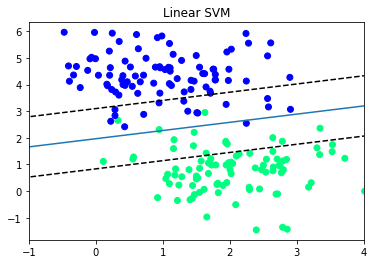

In [3]:
X, y = make_blobs(n_samples=250, centers=2, random_state=0, cluster_std=0.85)
y[y == 0] = -1
y = y.astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


'''
Linear Support Vector Classification.

parameters :

# penalty : {‘l1’, ‘l2’}, default=’l2’ / Specifies the norm used in the penalization.

# loss : {‘hinge’, ‘squared_hinge’}, default=’squared_hinge’  / Specifies the loss function.

# dual : bool, default=True
Select the algorithm to either solve the dual or primal optimization problem.

# tol : float, default=1e-4
Tolerance for stopping criteria.

# C : float, default=1.0
Regularization parameter. The strength of the regularization is inversely proportional to C.

etc...

'''
svc = LinearSVC(C=0.5)  # C로 제약조건의 강도 설정
svc.fit(X_train, y_train)

y_pred = svc.predict(X_train)  # Predict class labels for samples in X_train
print('training data = \n', confusion_matrix(y_train, y_pred))

y_pred = svc.predict(X_test)  # Predict class labels for samples in X_test
print('testing data = \n', confusion_matrix(y_test, y_pred))
plt.show()

def f(x, w, b, c=0):
    return (-w[0] * x - b + c) / w[1]

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter')
ax = plt.gca()
xlim = ax.get_xlim()
w = svc.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - svc.intercept_[0]/w[1]
plt.plot(xx, yy)
yy = a * xx - (svc.intercept_[0] -1)/w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (svc.intercept_[0] +1)/w[1]
plt.plot(xx, yy, 'k--')
plt.xlim(-1,4)
plt.title('Linear SVM')